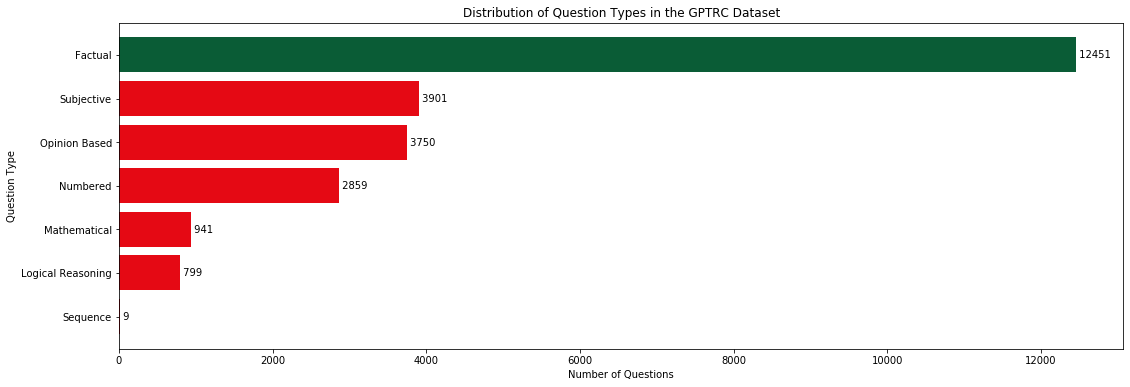

In [14]:
import matplotlib.pyplot as plt

# Categories and their corresponding counts
categories = ['Numbered', 'Mathematical', 'Logical Reasoning', 'Opinion Based', 'Subjective', 'Sequence', 'Factual']
counts = [2859, 941, 799, 3750, 3901, 9, 12451]

# Sort categories and counts based on counts in descending order
sorted_data = sorted(zip(categories, counts), key=lambda x: x[1], reverse=False)
categories, counts = zip(*sorted_data)

# Define colors for each bar
colors = ['#E50914'] * len(categories)  # Default color for all bars
factual_index = categories.index('Factual')
colors[factual_index] = '#0A5C36'  # Change color for 'Factual' bar

# Create the horizontal bar chart
plt.figure(figsize=(18, 6))  # Optional: Adjust the figure size as needed
bars = plt.barh(categories, counts, color=colors)  # Use plt.barh() for horizontal bar chart

# Adding titles and labels
plt.title('Distribution of Question Types in the GPTRC Dataset')
plt.xlabel('Number of Questions')
plt.ylabel('Question Type')

# Annotating each bar with its count value
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f' {int(bar.get_width())}',  # The space before the number is for padding
             va='center', ha='left')

# Show the plot
plt.show()

In [4]:
import pandas as pd

data = {'Category': categories, 'Count': counts}
df = pd.DataFrame(data)

# Sort the DataFrame by 'Count' column in descending order
df = df.sort_values(by='Count', ascending=False)

# Print the DataFrame as a table
df

,Category,Count
6,Factual,12451
5,Subjective,3901
4,Opinion Based,3750
3,Numbered,2859
2,Mathematical,941
1,Logical Reasoning,799
0,Sequence,9


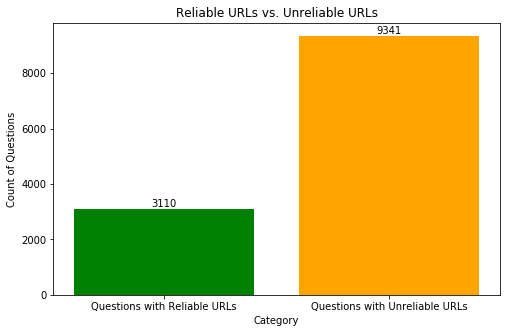

In [12]:
import matplotlib.pyplot as plt
import json

with open('../gptrc_reliable_urls.json', 'r') as file:
    # Read the content of the file
    questions_list = json.load(file)

# Counting questions with reliable URLs vs. questions with empty URL lists
questions_with_reliable_urls = 0
questions_with_empty_urls = 0

for question in questions_list:
    if not question["urls"]:  # If the URL list is empty
        questions_with_empty_urls += 1
    else:
        questions_with_reliable_urls += 1

# Plotting the bar graph
categories = ['Questions with Reliable URLs', 'Questions with Unreliable URLs']
counts = [questions_with_reliable_urls, questions_with_empty_urls]

plt.figure(figsize=(8, 5))
bars = plt.bar(categories, counts, color=['green', 'orange'])

# Annotating each bar with its height value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Count of Questions')
plt.title('Reliable URLs vs. Unreliable URLs')
plt.show()
